# Dataset Analysis and Feature Engineering

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import math

### Importing the data

In [3]:
DATA_DIR = "data"
df_train = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
df_test = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

### Univariate Analysis

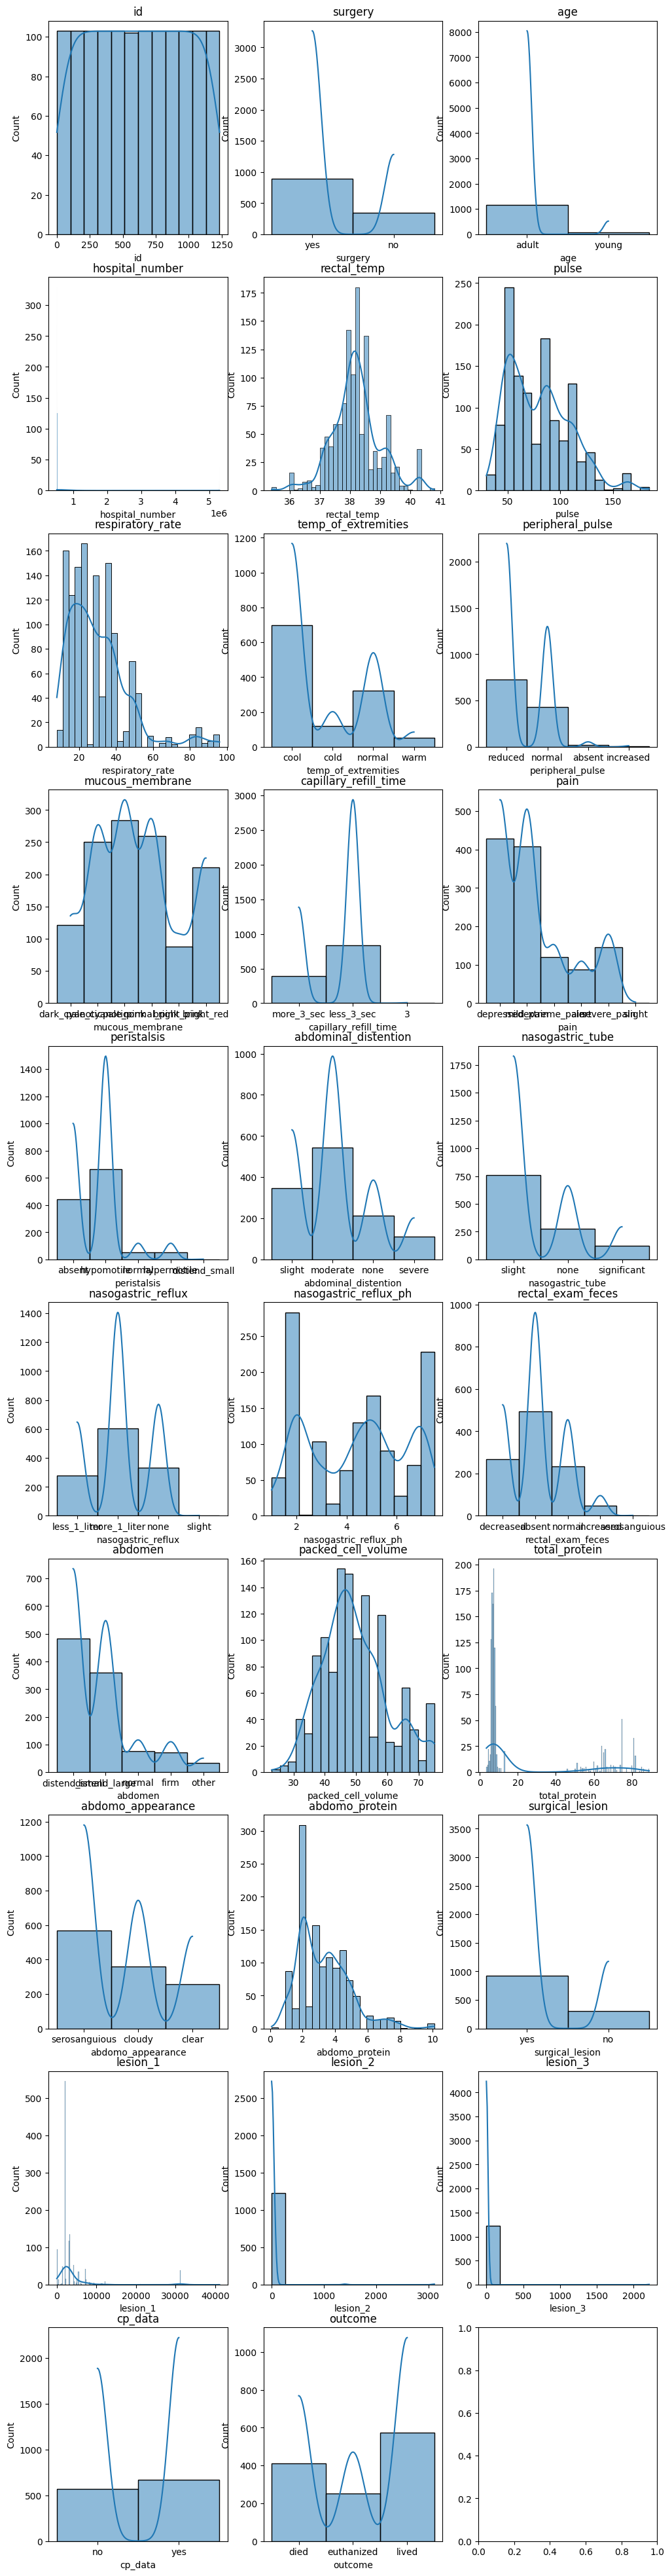

In [26]:
df_cols_list = list(df_train.columns)

i = 0
fig, ax = plt.subplots(int(math.ceil(len(df_cols_list) / 3)), 3, figsize=(12, 50))
for col in df_cols_list:
    sns.histplot(df_train[col], ax=ax[i // 3][i % 3], kde=True)
    ax[i // 3][i % 3].set_title(col)
    i += 1


### Bivariate Analysis wrt outcome

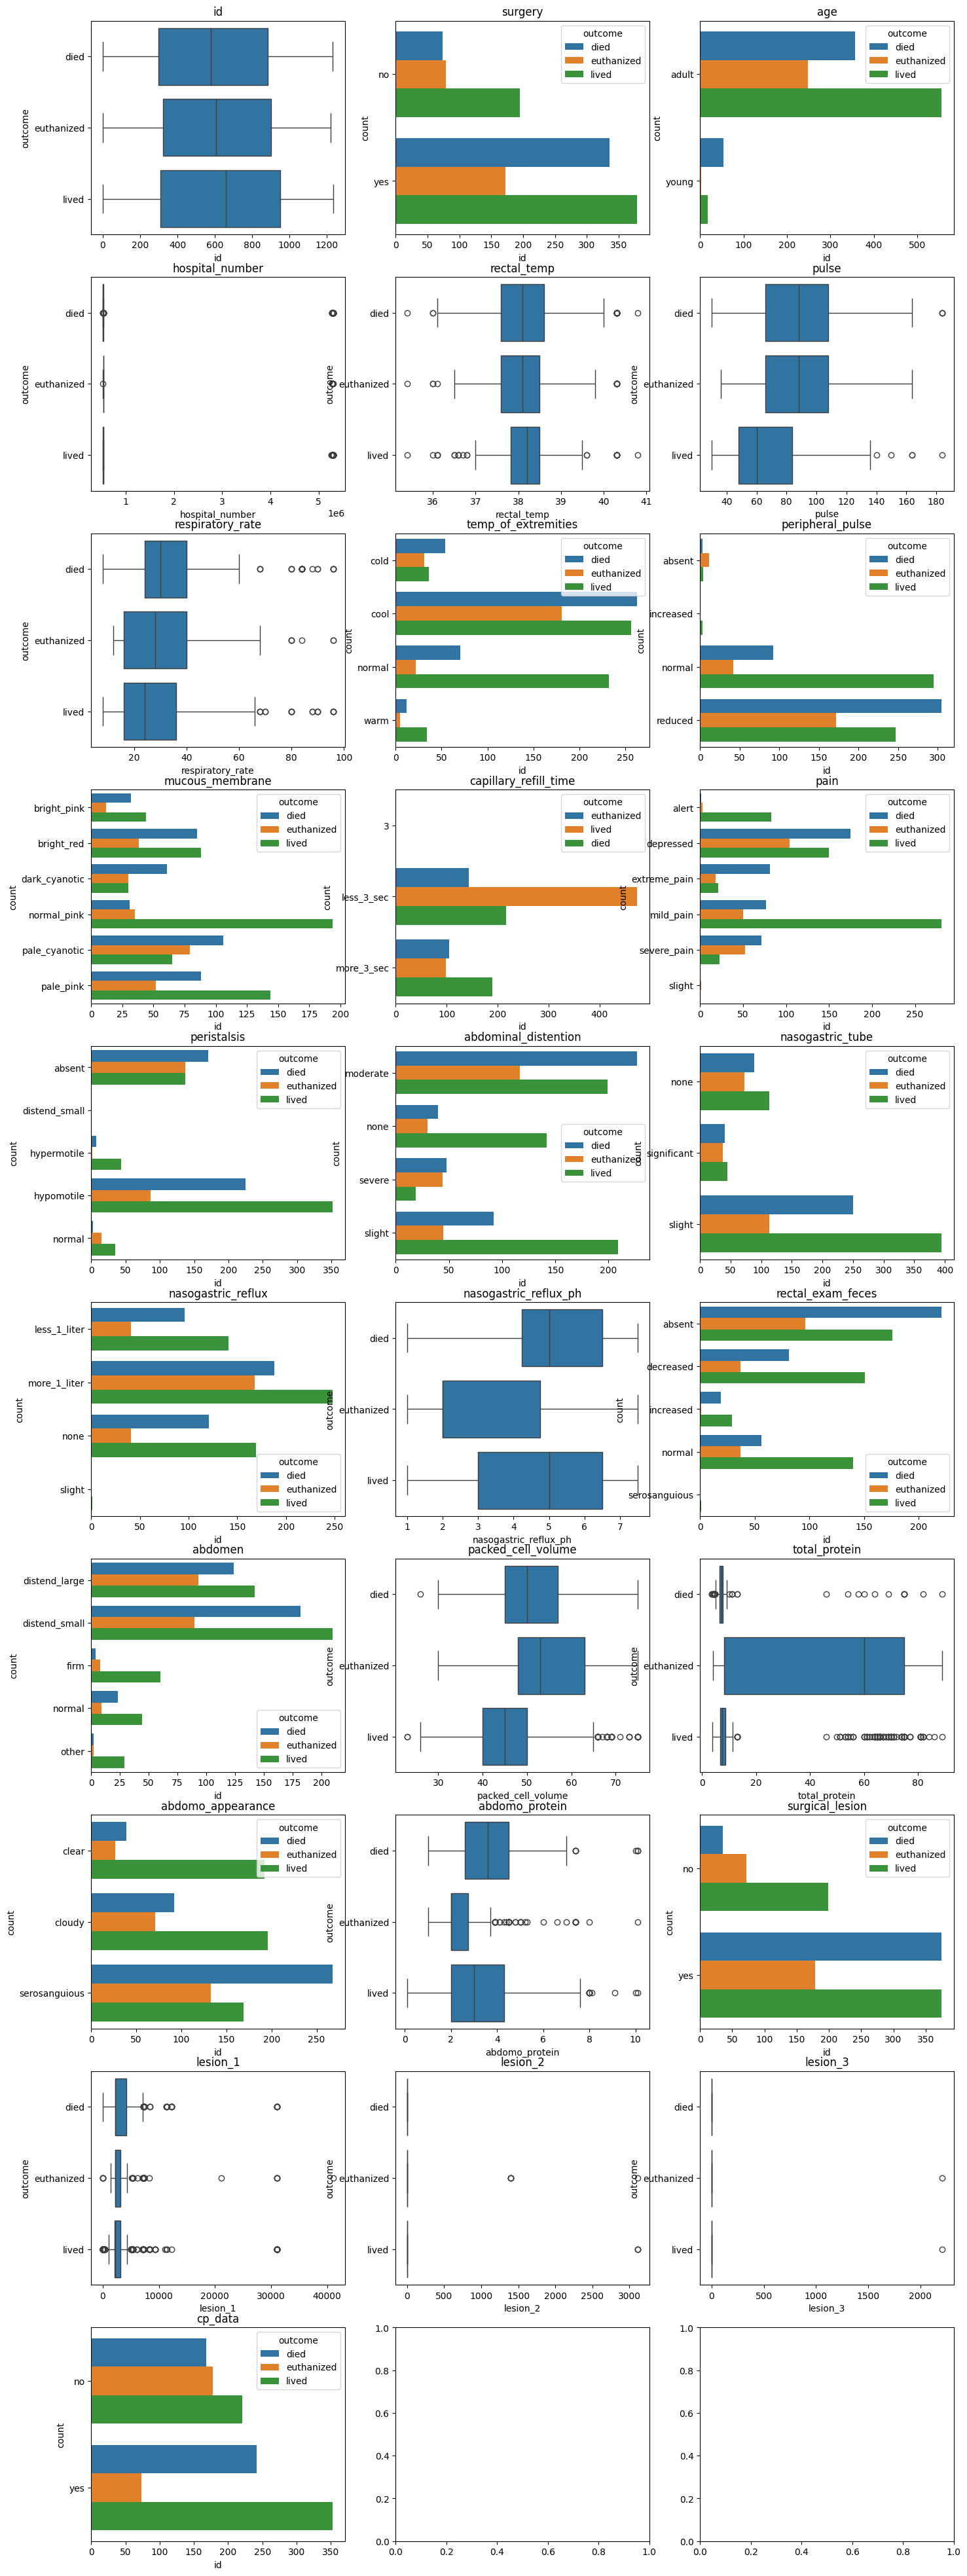

In [48]:
df_cols_list = list(df_train.columns)

i = 0
fig, ax = plt.subplots(int(math.ceil(len(df_cols_list) / 3)), 3, figsize=(17, 50))
for col in df_cols_list:
    if col == 'outcome':
        continue
    if df_train[col].dtype in ('int64', 'float64', 'int', 'float'):
        sns.boxplot(data=df_train, y='outcome', x=col, ax=ax[i // 3][i % 3])
    else:
        temp_df = pd.DataFrame()
        temp_df['outcome'] = df_train['outcome']
        temp_df[col] = df_train[col]
        temp_df['id'] = df_train['id']
        new_df = pd.DataFrame(temp_df.groupby([col, 'outcome'])['id'].count())
        sns.barplot(data=new_df, y=col, x='id', hue='outcome', ax=ax[i // 3][i % 3])
        ax[i // 3][i % 3].set_ylabel('count')
    ax[i // 3][i % 3].set_title(col)
    i += 1

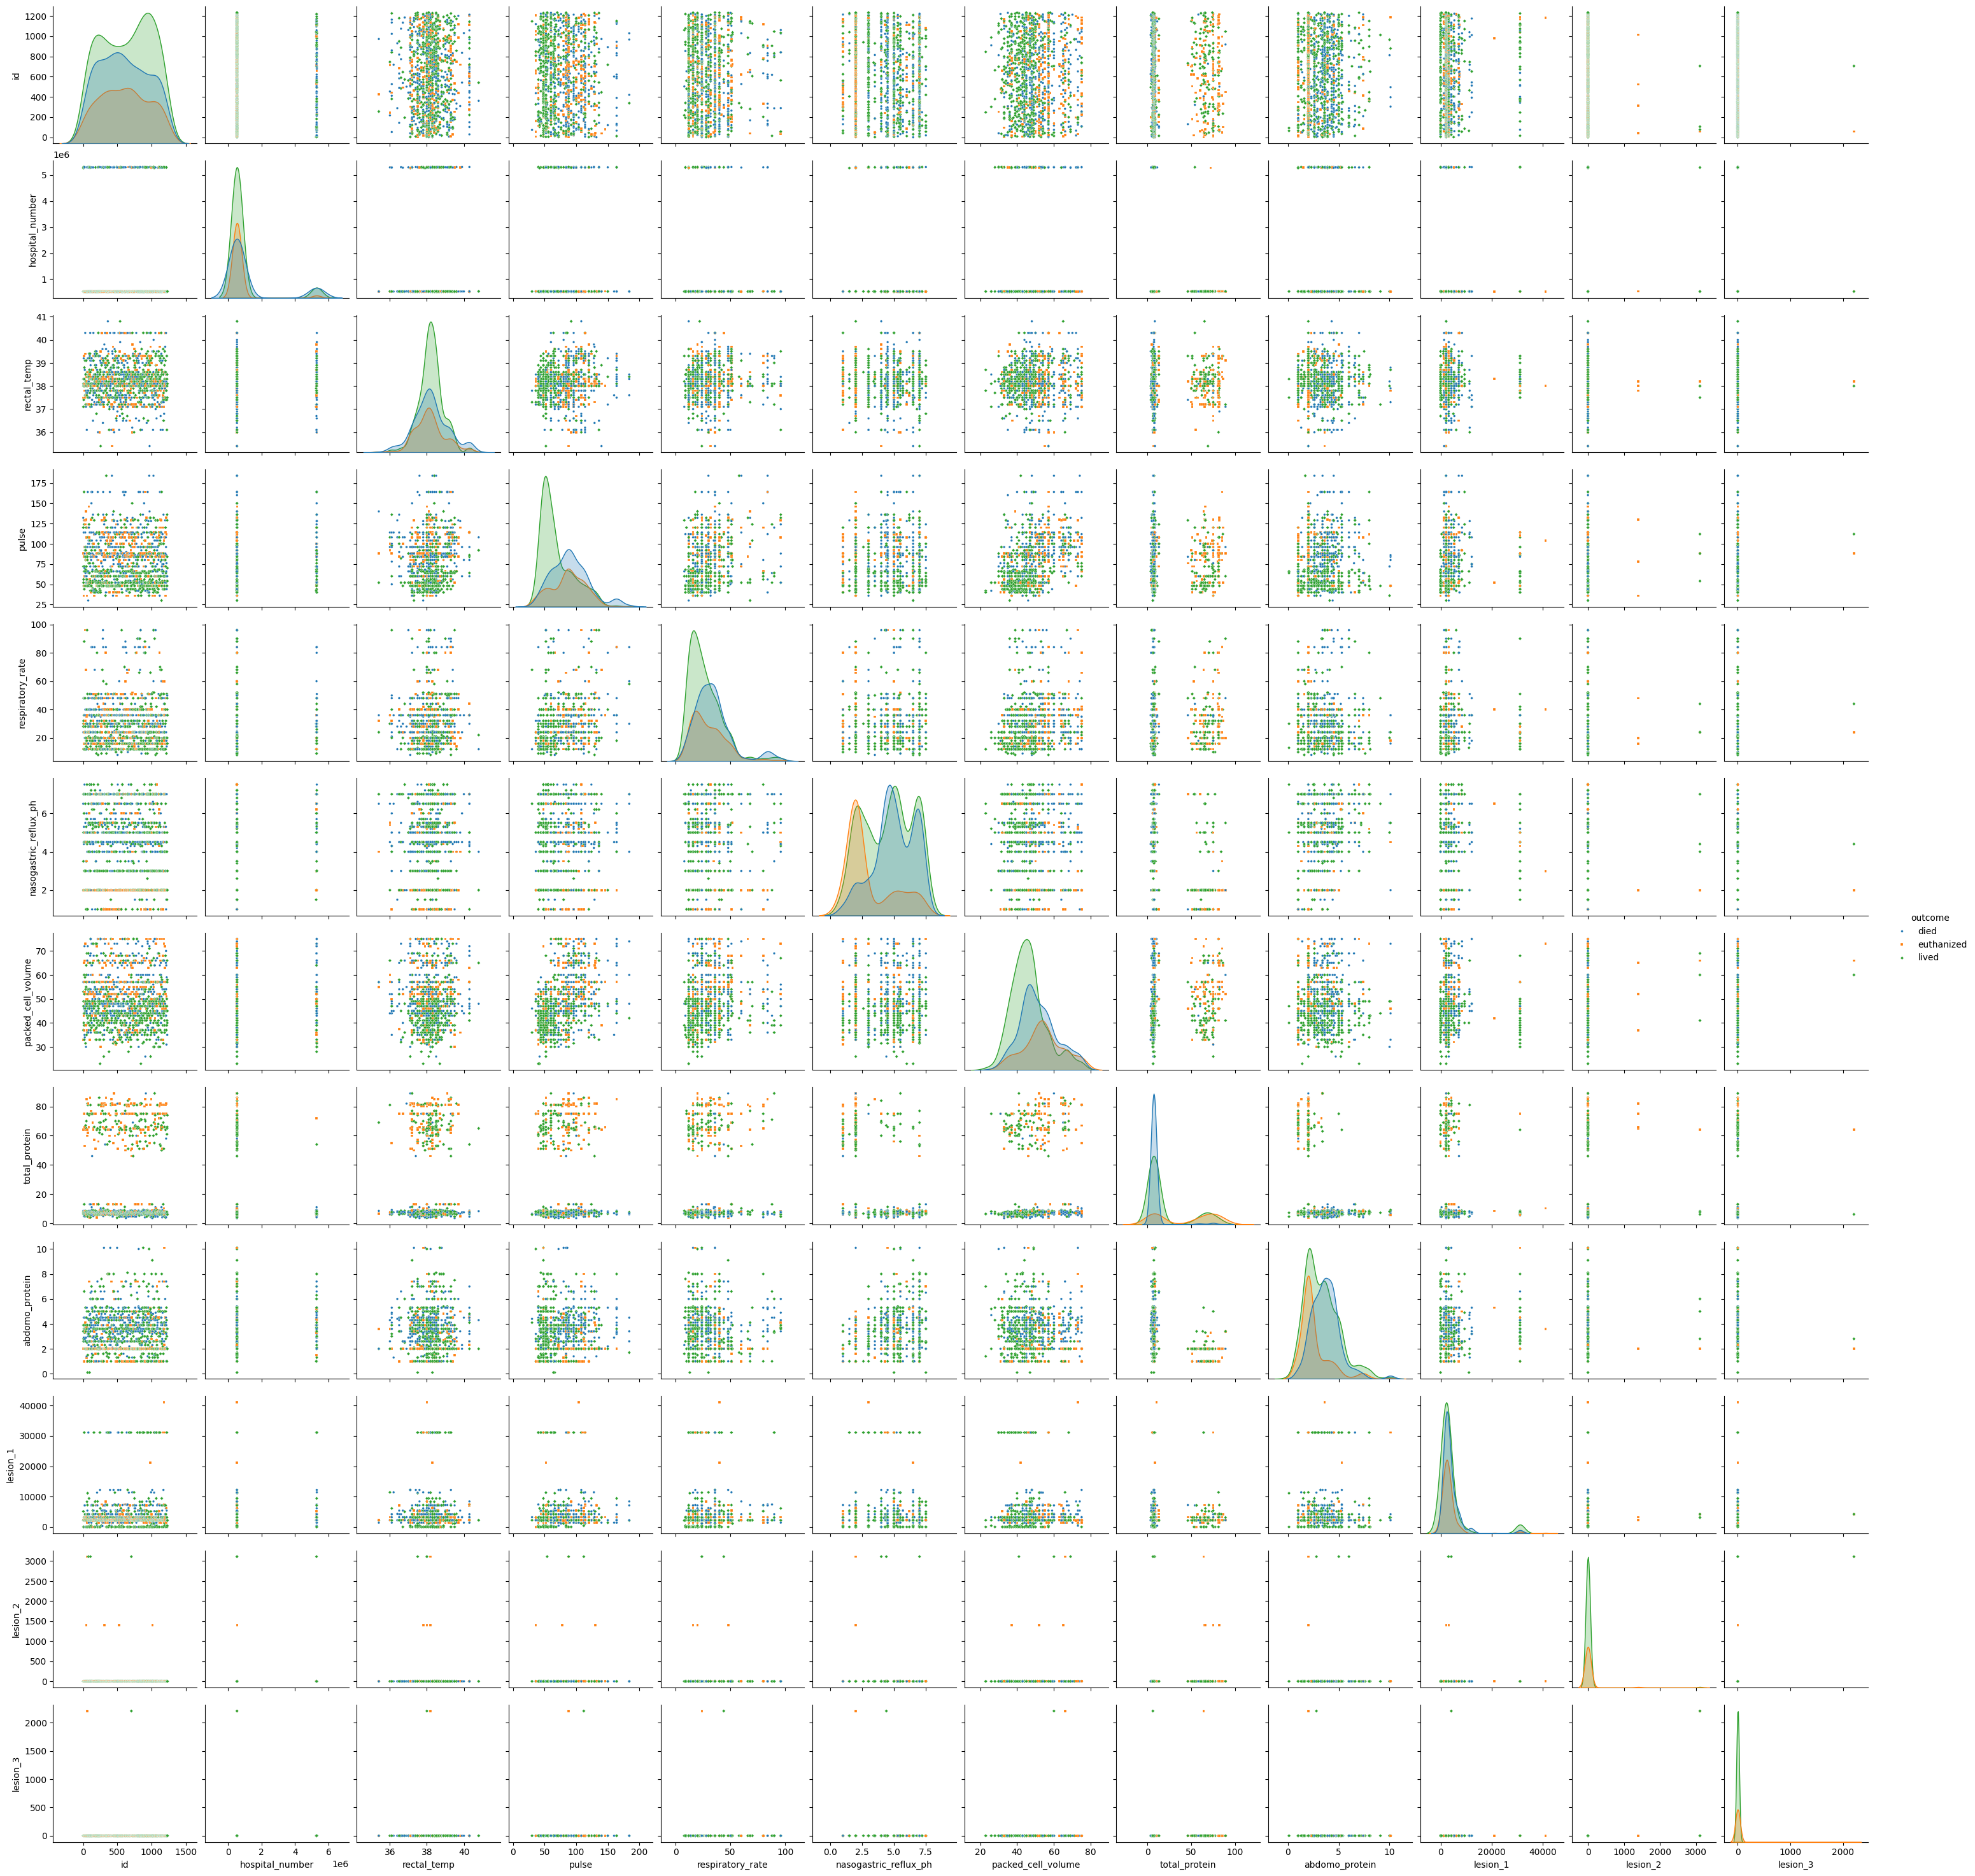

In [53]:
sns.pairplot(df_train, kind="scatter", hue="outcome", markers=["o", "s", "D"], plot_kws={"s": 7})
plt.show()